### c)

In [3]:
import numpy as np
from scipy import linalg
import scipy.linalg
import matplotlib.pyplot as plt
#from tabulate import tabulate

First we implement the Jacobi Matrix for the non-trivial fixed point.

In [5]:
Jac_Matrix = np.array([[-1, 0, 0, -20, -30, -5],
              [0, -1, 0, -1, -3, -7],
              [0, 0, -1, -4, -10, -20],
              [20, 30, 35, 0, 0, 0],
              [3 ,3 ,3, 0, 0, 0],
              [7, 8, 20, 0, 0, 0]])


In [10]:
ev,vecs = linalg.eig(Jac_Matrix)
vecs[0].tolist()

[(-0.008080481470007499+0.5434218148944657j),
 (-0.008080481470007499-0.5434218148944657j),
 (-0.8691366141481551+0j),
 (-0.8691366141481551-0j),
 (-0.5376206635443183+0j),
 (0.08149945426427721+0j)]

In this task we want to look at the eigenvalues and eigenvectors, so we print the calculated values/vectors (computed using linalg):

In [11]:
print(tabulate([[1, ev[0], vecs[0]], [2, ev[1], vecs[1]], [3, ev[2], vecs[2]], [4, ev[3], vecs[3]], [5, ev[4], vecs[4]], [6, ev[5], vecs[5]]], headers=['', 'Eigenvalues', 'Eigenvectors']))

NameError: name 'tabulate' is not defined

As we can see the last eigenvalue is positive. This means our non trivial fixed point is not stable.

The (approximated) time evolution is
\begin{equation}
N(t)=N^*+\sum\limits_{i=1}^6c_iv_ie^{t\lambda_i}
\end{equation}
The $\lambda_i$ are the eigenvalues, $N^*$ are the values for the non-trivial fixed point and $c_n$ are the given coefficents

In [12]:
c = np.array([3, 3, 1, 1, -5, 0.1])
#Function to calculate N(t)
def f(t):      
     return np.array([1,1,1,1,1,1])+sum([c[i]*np.exp(t*ev[i])*np.array(vecs[:,i]) for i in range(5)])    

In [13]:
t = np.linspace(0, 6, 900)
pop_pred = [f(i) for i in t]

We want to look at the evolution of the prey and predator population. To do so we plot the time development of both populations:

C:\Users\Selina\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


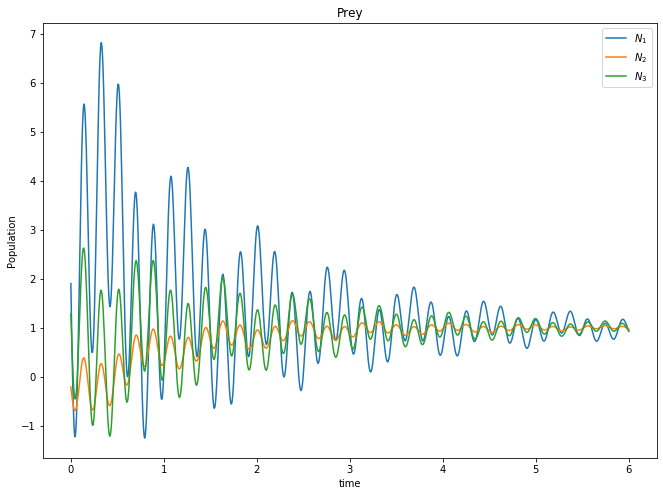

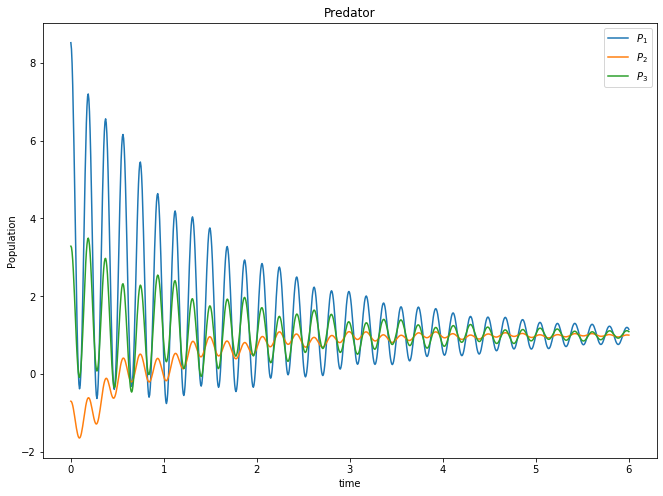

In [14]:
fig = plt.figure(figsize=(11,8))
plt.title("Prey")
plt.xlabel("time")
plt.ylabel("Population")
for i in range(3):
    plt.plot(t, [j[i] for j in pop_pred], label=(f"$N_{i+1}$"))
plt.legend()

fig = plt.figure(figsize=(11,8))
plt.title("Predator")
plt.xlabel("time")
plt.ylabel("Population")
for i in range(3,6):
    plt.plot(t, [j[i] for j in pop_pred], label=(f"$P_{i-2}$"))
plt.legend()

This looks as expected, we get  oscillations in both the predator and the prey populations. An interesting observation is that the population all apporaches the non trivial fixed point 1 after some time development. Even though the negative "population" numbers can not represent the development of real populations, the emergence of this pattern still represents the biological phenomenon of populatins of different species in an ecosytem reaching a sort of "equilibrium", a state in which their popultion size remains relatively stable,oscilalting around the fixed point with a small amplitude.